<a href="https://colab.research.google.com/github/Sterling-M/Python-Practice/blob/main/classify0_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Samples of the training images


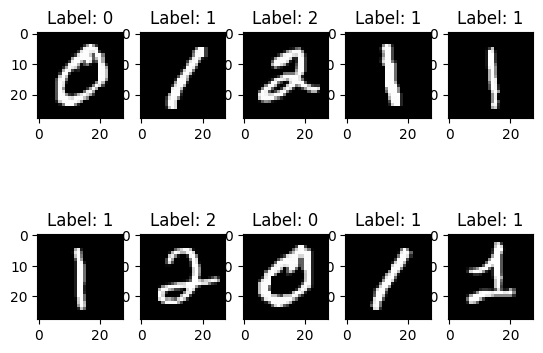

Sample of images of the testing images


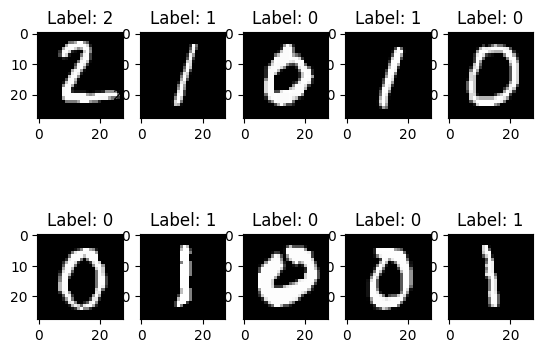

samples of the validation images


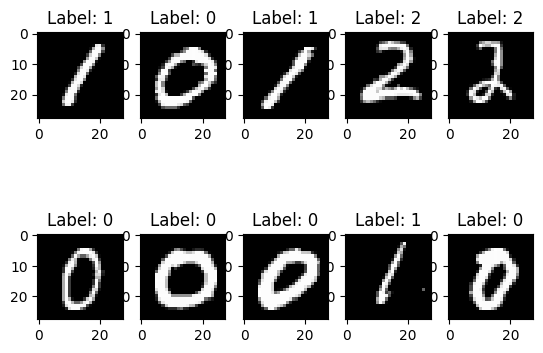

Plotting the features of 500 training images: 


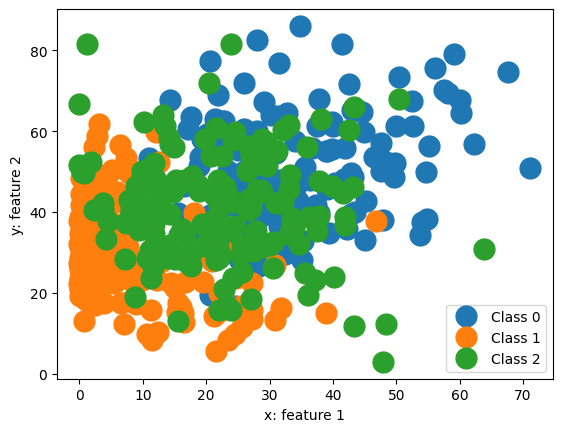

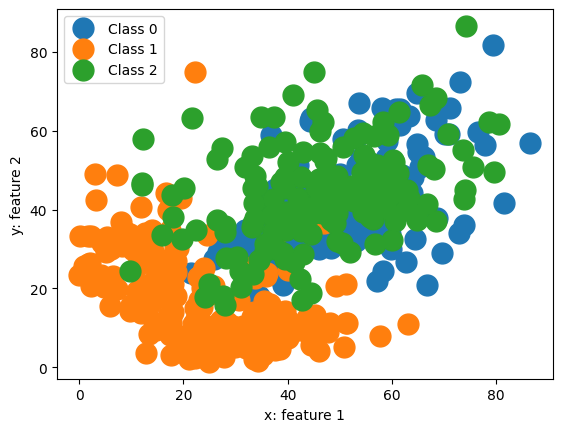

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt(images, labels):
  plt.figure() #fig size = (15,8)
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:], cmap='gray')
    plt.title('Label: '+str(labels[i-1]))
  plt.show()


def feat_extract(images):
    width=images.shape[1]
    height=images.shape[2]
    features=np.zeros((images.shape[0],4))
    features_temp=np.sum(images[:,0:int(width/2),0:int(height/2)],axis=2)#quadrant 0
    features[:,0]=np.sum(features_temp,axis=1)/(width*height/4)
    features_temp=np.sum(images[:,0:int(width/2),int(height/2):],axis=2)#quadrant 1
    features[:,1]=np.sum(features_temp,axis=1)/(width*height/4)
    features_temp=np.sum(images[:,int(width/2):,0:int(height/2)],axis=2)#quadrant 2
    features[:,2]=np.sum(features_temp,axis=1)/(width*height/4)
    features_temp=np.sum(images[:,int(width/2):,int(height/2):],axis=2)#quadrant 3
    features[:,3]=np.sum(features_temp,axis=1)/(width*height/4)
    return features

def feat_plot(features, labels, classes):
    for class_i in classes:
        plt.plot(features[labels == class_i, 0],
                 features[labels == class_i, 1], 'o', markersize=15)
       #plt.axis([-2,2,-2,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class ' + str(class_i) for class_i in classes])
    plt.show()

def acc_fun(labels_actual, labels_pred):
  acc=np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train),(x_test, y_test)=mnist.load_data()

#selecting only 0 and 1 digits form the training set
classes=[0,1,2]
x_train_012=x_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2)),0:28,0:28]
y_train_012=y_train[np.logical_or.reduce((y_train==0,y_train==1,y_train==2))]
print('Samples of the training images')
img_plt(x_train_012[0:10:,:],y_train_012[0:10])

x_test_012=x_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2)),0:28,0:28]
y_test_012=y_test[np.logical_or.reduce((y_test==0,y_test==1,y_test==2))]
print('Sample of images of the testing images')
img_plt(x_test_012[0:10:,:],y_test_012[0:10])



#selecting 500 images from the training dat as the validation set
#shuffling the training data
num_train_img=x_train_012.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train_012=x_train_012[train_ind_s,:,:]
y_train_012=y_train_012[train_ind_s]
#selecting 500 images for validation
x_val_012=x_train_012[0:500,:,:]
y_val_012=y_train_012[0:500]
#the rest of the training set
x_train_012=x_train_012[500:,:,:]
y_train_012=y_train_012[500:]
print('samples of the validation images')
img_plt(x_val_012[0:10,:,:],y_val_012[0:10])

#calculate the traing,validation,and testing features(average of the fgour quadrant grid)
feature_train=feat_extract(x_train_012)
feature_val=feat_extract(x_val_012)
feature_test=feat_extract(x_test_012)

print('Plotting the features of 500 training images: ')
feat_plot(feature_train[1:500, 0:2],y_train_012[1:500],classes)
feat_plot(feature_train[1:500, 2:4],y_train_012[1:500],classes)



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 256)               1280      
                                                                 
 dense_38 (Dense)            (None, 16)                4112      
                                                                 
 dense_39 (Dense)            (None, 3)                 51        
                                                                 
Total params: 5443 (21.26 KB)
Trainable params: 5443 (21.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1133/1133 [==============================] - 3s 2ms/step - loss: 0.7272 - accuracy: 0.7697
Epoch 2/20
1133/1133 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.8741
Epoch 3/20
1133/1133 [==============================] - 2s 1ms/step - loss: 0.4

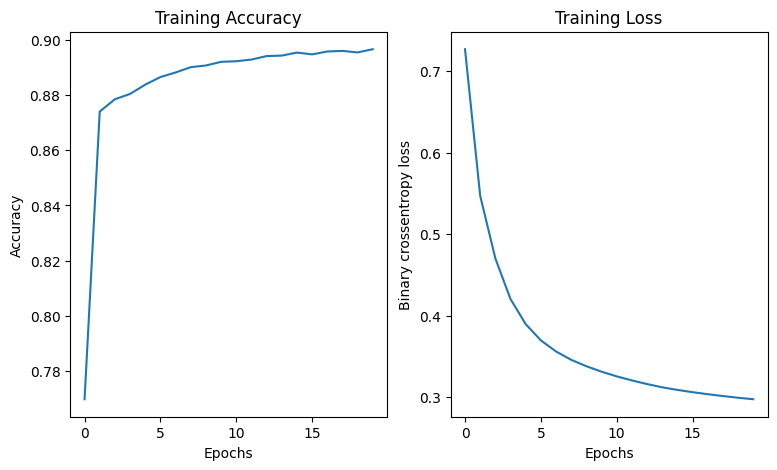

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.title('Training Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  #plt.axis([-1,2,-1,2])
  plt.title('Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Binary crossentropy loss')
  plt.show()


model_a=Sequential()
model_a.add(Dense(input_dim=4,units=256,activation='tanh'))
model_a.add(Dense(16,activation='tanh'))
model_a.add(Dense(units=len(classes),activation='softmax'))
model_a.summary()

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model_a.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

from keras.utils import to_categorical
y_train_012_c=to_categorical(y_train_012,len(classes))
y_val_012_c=to_categorical(y_val_012,len(classes))
y_test_012_c=to_categorical(y_test_012,len(classes))

#features= (feature_train-np.mean(features,axis=0))/np.std(features,axis=0) #normallization

history=model_a.fit(feature_train, y_train_012_c,
                    batch_size=16,
                    epochs=30,
                    verbose=1)
score=model_a.evaluate(feature_train,y_train_012_c)
print('Total loss on training set: ',score[0])
print('Accuracy of training set: ',score[1])


score=model_a.evaluate(feature_val,y_val_012_c,)
print('Total loss on validation set: ',score[0])
print('Accuracy of validation set: ',score[1])

plt.figure(figsize=(9,5))
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
score=model_a.evaluate(feature_test,y_test_012_c)
print('Total loss on testing set: ',score[0])
print('Accuracy of testing set: ',score[1])

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

test_class1_prob=model_a.predict(feature_test)
test_lab=np.argmax(test_class1_prob,axis=1)
print('The accuracy using the testing set: ',
    accuracy_score(test_lab,y_test_012))
conf_mat=confusion_matrix(test_lab,y_test_012)
print('The confusion matrix using testing set: \n',conf_mat)

99/99 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8862
Total loss on testing set:  0.31764325499534607
Accuracy of testing set:  0.8862408399581909
99/99 [==============================] - 0s 3ms/step
The accuracy using the testing set:  0.8862408643152209
The confusion matrix using testing set: 
 [[ 907   28  184]
 [   7 1080   46]
 [  66   27  802]]
